# Code Challenge - National Corn Yield Prediction

The workflow in this notebook includes following parts:

1. [Clean National CORN Yield Data (US_NATIONAL_CORN_YIELD.csv)](#section1)

2. [Clean CRD Corn Yield Data (US_CRD_CORN_YIELD_DATA_FILE.csv)](#section2)

3. [Clean weather data (US_CRD_daily_weather_2010_to_current.csv)](#section3)

4. [Compute Meterological Indices](#section4)

5. [Exploratory Data Analysis](#section5)


In [1]:
# load data and check
# 

import pandas as pd
import numpy as np

yld_df = pd.read_csv('data/US_CRD_CORN_YIELD_DATA_FILE.csv')
weather_df = pd.read_csv('data/US_CRD_daily_weather_2010_to_current.csv')
national_yld_df = pd.read_csv('data/US_NATIONAL_CORN_YIELD.csv')

<a id='section1'></a>
## Clean National Corn Yield Data
* remove unnecessary columns
* remove NaNs

In [2]:
national_yld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 21 columns):
Program             11 non-null object
Year                11 non-null int64
Period              11 non-null object
Week Ending         0 non-null float64
Geo Level           11 non-null object
State               11 non-null object
State ANSI          0 non-null float64
Ag District         0 non-null float64
Ag District Code    0 non-null float64
County              0 non-null float64
County ANSI         0 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      11 non-null int64
Watershed           0 non-null float64
Commodity           11 non-null object
Data Item           11 non-null object
Domain              11 non-null object
Domain Category     11 non-null object
Value               11 non-null float64
CV (%)              0 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 1.9+ KB


In [3]:
# remove columns with zero non-null
national_yld_df.dropna(axis=1, how='all', inplace=True)
# remove columns with only one unique value
national_yld_df = national_yld_df[national_yld_df.apply(pd.Series.value_counts).dropna(thresh=2, axis=1).columns]
# get rid of 2009
national_yld_df = national_yld_df[national_yld_df['Year'] != 2009]
national_yld_df.head()

,Year,Value
0,2019,168.0
1,2018,176.4
2,2017,176.6
3,2016,174.6
4,2015,168.4


In [4]:
national_yld_df.describe()

,Year,Value
count,10.00000,10.000000
mean,2014.50000,161.560000
std,3.02765,16.941481
min,2010.00000,123.100000
25%,2012.25000,153.975000
50%,2014.50000,168.200000
75%,2016.75000,173.700000
max,2019.00000,176.600000


<a id='section2'></a>
## Clean crd corn yield data
* remove unnecessary columns
* remove NaNs
* pivot field

In [5]:
yld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 22 columns):
Program             4894 non-null object
Year                4894 non-null int64
Period              4894 non-null object
Week Ending         0 non-null float64
Geo Level           4894 non-null object
State               4894 non-null object
State ANSI          4894 non-null int64
Ag District         4894 non-null object
Ag District Code    4894 non-null int64
FIPS                4894 non-null int64
County              0 non-null float64
County ANSI         0 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      4894 non-null int64
Watershed           0 non-null float64
Commodity           4894 non-null object
Data Item           4894 non-null object
Domain              4894 non-null object
Domain Category     4894 non-null object
Value               4894 non-null float64
CV (%)              0 non-null float64
dtypes: f

There are many columns with NaNs, and also many of them are only having one unique value. Those columns should be removed

In [6]:
# remove columns with zero non-null
yld_df.dropna(axis=1, how='all', inplace=True)
# remove columns with only one unique value
yld_df = yld_df[yld_df.apply(pd.Series.value_counts).dropna(thresh=2, axis=1).columns]
yld_df.head()

,Year,State,State ANSI,Ag District,Ag District Code,FIPS,Data Item,Value
0,2019,ALABAMA,1,BLACK BELT,40,140,CORN - ACRES PLANTED,33000.0
1,2019,ALABAMA,1,BLACK BELT,40,140,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",127.4
2,2019,ALABAMA,1,COASTAL PLAINS & GULF COAST,50,150,CORN - ACRES PLANTED,20000.0
3,2019,ALABAMA,1,COASTAL PLAINS & GULF COAST,50,150,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",128.8
4,2019,ALABAMA,1,MOUNTAINS & EASTERN VALLEY,20,120,CORN - ACRES PLANTED,61000.0


The **Data Item** column shows two different information, which are Acres Planted and Yield, and they are corresponding to the values in **Value** column. It is better to pivot these two columns from long to wide.

In [7]:
# pivot table
yld_df = yld_df.pivot_table(columns=['Data Item'], 
                            index=[n for n in yld_df.columns.values 
                                   if n not in ['Data Item', 'Value']], 
                            values='Value').reset_index()
yld_df.head()

Data Item,Year,State,State ANSI,Ag District,Ag District Code,FIPS,CORN - ACRES PLANTED,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE"
0,2010,ALABAMA,1,BLACK BELT,40,140,22000.0,93.8
1,2010,ALABAMA,1,COASTAL PLAINS & GULF COAST,50,150,15500.0,113.1
2,2010,ALABAMA,1,MOUNTAINS & EASTERN VALLEY,20,120,48500.0,98.9
3,2010,ALABAMA,1,NORTHERN VALLEY,10,110,127000.0,132.0
4,2010,ALABAMA,1,UPPER PLAINS & PIEDMONT,30,130,25000.0,108.9


remove some of the redundant columns and rename the columns with really really long names

In [8]:
state_code_df = yld_df[['State', 'State ANSI']].drop_duplicates()
yld_df.drop(['State', 'State ANSI', 'Ag District'], axis=1, inplace=True)
yld_df.columns = ['Year', 'CRD', 'FIPS', 'Area', 'Yield']
yld_df.head()

,Year,CRD,FIPS,Area,Yield
0,2010,40,140,22000.0,93.8
1,2010,50,150,15500.0,113.1
2,2010,20,120,48500.0,98.9
3,2010,10,110,127000.0,132.0
4,2010,30,130,25000.0,108.9


In [9]:
yld_df['Total_yield'] = yld_df['Yield'] * yld_df['Area']
yld_df.head()

,Year,CRD,FIPS,Area,Yield,Total_yield
0,2010,40,140,22000.0,93.8,2063600.0
1,2010,50,150,15500.0,113.1,1753050.0
2,2010,20,120,48500.0,98.9,4796650.0
3,2010,10,110,127000.0,132.0,16764000.0
4,2010,30,130,25000.0,108.9,2722500.0


* The dataset was collected at FIPS level, let's aggregate data up to the CRD level

In [10]:
crd_yld_df = yld_df.groupby(['CRD', 'Year'])[['Area','Total_yield']].sum().reset_index() # aggregate information at CRD level
crd_yld_df['Yield'] = crd_yld_df['Total_yield'] / crd_yld_df['Area'] # recalculate yield
crd_yld_df

,CRD,Year,Area,Total_yield,Yield
0,10,2010,9722300.0,1.509606e+09,155.272507
1,10,2011,10207300.0,1.552550e+09,152.101960
2,10,2012,10819800.0,1.337073e+09,123.576459
3,10,2013,10649500.0,1.684256e+09,158.153547
4,10,2014,9866700.0,1.662200e+09,168.465643
...,...,...,...,...,...
189,98,2015,516300.0,6.256931e+07,121.187895
190,98,2016,708300.0,1.084872e+08,153.165608
191,98,2017,504300.0,5.914212e+07,117.275669
192,98,2018,523200.0,7.234013e+07,138.264774


* Save FIPS level datasets and check completeness

In [11]:
fips_yld_df = yld_df # save yld df at FIPS level

# check FIPS completeness
n_fips = fips_yld_df['FIPS'].unique().shape[0]
print(f"if each FIPS has records for 10 years, we would expect {n_fips * 10} rows of records")
# vs. 2447 records

if each FIPS has records for 10 years, we would expect 2780 rows of records


In [12]:
# print FIPS has less then 10 years of records
fips_cnt = fips_yld_df['FIPS'].value_counts().reset_index()
fips_cnt[fips_cnt['FIPS'] != 10]

,index,FIPS
204,650,9
205,4896,9
206,540,9
207,4520,9
208,4510,9
...,...,...
273,5620,1
274,4851,1
275,1690,1
276,4598,1


74 out of 278 FIPS didn't have enough yield records, which might introduce uncertainty while directly (average) scaling up to national levels. Let's check what were the years having less than 278 FIPS

In [13]:
yr_fips_df = fips_yld_df.pivot_table(values='FIPS', index='Year', aggfunc='count').reset_index()
yr_fips_df['missing_pct'] = yr_fips_df['FIPS'] / 278
yr_fips_df

,Year,FIPS,missing_pct
0,2010,251,0.902878
1,2011,255,0.917266
2,2012,254,0.913669
3,2013,246,0.884892
4,2014,251,0.902878
5,2015,245,0.881295
6,2016,247,0.888489
7,2017,233,0.838129
8,2018,231,0.830935
9,2019,234,0.841727


Let's check wether such information loss can lead to inconsistency between national level yield data and FIPS level yield data

In [14]:
x_national_yld = fips_yld_df.groupby(['Year'])['Area', 'Total_yield'].sum().reset_index()
x_national_yld['Yield'] = x_national_yld['Total_yield'] / x_national_yld['Area']
x_national_yld['Yield'] - national_yld_df[national_yld_df['Year'] != 2009]['Value']

0   -15.917821
1   -30.785039
2   -54.025656
3   -17.190940
4     1.448018
5    -3.415222
6    15.381609
7    52.684726
8    28.443725
9    14.819369
dtype: float64

<a id='section3'></a>
## Clean Weather Data
* clean up unnecessary data

In [15]:
weather_df.head()

,Unnamed: 0,index,aoi_name,Dy,mmdd,Mn,ppt,tmax,tmin,week,Year,tdmean,fips,State,CRD
0,3230560,3230865.0,Ohio_218,1,101,1,0.017299,25.147633,11.278373,53.0,2010,18.213003,3960,39,60
1,3230561,3230866.0,Ohio_217,1,101,1,0.026674,22.506238,9.452707,53.0,2010,15.979472,3950,39,50
2,3230562,3230867.0,Ohio_216,1,101,1,0.016502,19.408903,8.367192,53.0,2010,13.888047,3940,39,40
3,3230564,3230869.0,Ohio_214,1,101,1,0.048198,22.344930,9.623062,53.0,2010,15.983996,3920,39,20
4,3230565,3230870.0,Ohio_213,1,101,1,0.003788,22.993588,9.352517,53.0,2010,16.173053,3910,39,10


In [ ]:
# check how many data can be used to infer 2020
weather_df = pd.read_csv('drive/My Drive/interview_file/US_CRD_daily_weather_2010_to_current.csv')
weather_df[weather_df['Year'] == 2020][['Year', 'Mn']].drop_duplicates()

In [16]:
weather_df.drop(['Unnamed: 0','index','aoi_name','mmdd'], axis=1, inplace=True)
weather_df.tail()

,Dy,Mn,ppt,tmax,tmin,week,Year,tdmean,fips,State,CRD
1034290,27,12,0.031876,28.050982,5.232170,52.0,2019,16.641576,3880,38,80
1034291,28,12,0.275591,25.832701,16.058745,52.0,2019,20.945723,3880,38,80
1034292,29,12,0.119944,21.045461,16.558885,52.0,2019,18.802173,3880,38,80
1034293,30,12,0.003036,25.445561,8.196903,1.0,2019,16.821232,3880,38,80
1034294,31,12,0.005560,33.609318,5.225666,1.0,2019,19.417492,3880,38,80


In [18]:
weather_df['tddiff'] = weather_df['tmax'] - weather_df['tmin']
weather_df.head()

,Dy,Mn,ppt,tmax,tmin,week,Year,tdmean,fips,State,CRD,tddiff
0,1,1,0.017299,25.147633,11.278373,53.0,2010,18.213003,3960,39,60,13.869260
1,1,1,0.026674,22.506238,9.452707,53.0,2010,15.979472,3950,39,50,13.053531
2,1,1,0.016502,19.408903,8.367192,53.0,2010,13.888047,3940,39,40,11.041711
3,1,1,0.048198,22.344930,9.623062,53.0,2010,15.983996,3920,39,20,12.721867
4,1,1,0.003788,22.993588,9.352517,53.0,2010,16.173053,3910,39,10,13.641071


In [19]:
# get monthly and weekly weather dataset
monthly_weather = weather_df.groupby(['Year','Mn','fips','State']).agg({'ppt': ['mean', 'sum', 'max', 'min', 'median'],
                                                               'tmax': 'max',
                                                               'tmin': 'min',
                                                               'tdmean': ['mean', 'median'],
                                                               'tddiff': ['mean', 'median', 'max', 'min']}).reset_index()
monthly_weather.columns = ['Year', 'Mn', 'FIPS', 'State_code', 'ppt_m', 'ppt_sum', 'ppt_max',
                           'ppt_min', 'ppt_median', 'tmax', 'tmin', 'tmean', 
                           'tmean_median', 'tdif_m', 'tdif_median', 'tdif_max',
                           'tdif_min']
monthly_weather.head()

,Year,Mn,FIPS,State_code,ppt_m,ppt_sum,ppt_max,ppt_min,ppt_median,tmax,tmin,tmean,tmean_median,tdif_m,tdif_median,tdif_max,tdif_min
0,2010,1,110,1,0.215732,5.609020,1.590849,0.0,0.000000e+00,61.284578,10.923361,34.405612,33.139724,19.858618,19.797351,35.529521,6.640388
1,2010,1,120,1,0.168175,4.708894,1.920334,0.0,9.285287e-05,66.332241,11.444266,34.771268,33.218954,19.671796,19.307341,34.846048,5.843171
2,2010,1,130,1,0.180755,5.422641,1.536744,0.0,3.773660e-05,70.327310,12.123066,38.154886,38.783331,21.919349,21.791396,37.465120,9.755621
3,2010,1,140,1,0.199828,6.194672,2.146996,0.0,1.874690e-04,71.275357,14.547475,40.413770,40.513186,22.024074,21.609415,35.830340,8.974113
4,2010,1,150,1,0.235675,6.127552,3.034429,0.0,1.105618e-07,72.968189,15.631689,44.437561,45.862768,23.214236,24.436996,30.484393,11.701255


<a id='section4'></a>
## Compute Meteorological Indices
* Standardized Precipitation Index (SPI)
* Potential Evapotranspiration Index (PET)
* Percentage of Normal Precipitation Index (PNP)
* Standardized Precipitation Evapotranspiration Index (SPEI)
* Drought Reconnaissance Index (DRI)

In [20]:
# Some of the indices are based on script that is modifed
# from https://www.drought.gov/drought/climate-and-drought-indices-python

from climate_indices.indices import spi, spei, percentage_of_normal


class monthly_climate_indices():
    
    def __init__(self, weather_data):
        self.start_year = weather_data['Year'].values[0]
        # use first six years for calibration
        self.final_year_cal = self.start_year + 5
        # use months that before April to calibrate
        self.scale = 5 - weather_data['Mn'].values[0]
        self.mn_ppt = weather_data['ppt_sum'].values * 25.4 # convert to mm
        self.tmean = (weather_data['tmean'].values - 32) * 5 / 9 # convert to C
        
        
    @staticmethod
    def consecutive_chunk(dat, chunk_size):
        '''
        create chunks with same size that is consecutive
        '''
        return [dat[i : i+chunk_size] for i in np.arange(len(dat) - chunk_size + 1)]
    
    @staticmethod
    def cumulative_chunk(dat, chunk_size):
        '''
        create chunks with increasing size that is consecutive
        '''
        return [dat[0 : i+chunk_size] for i in np.arange(len(dat) - chunk_size + 1)]

    def get_SPI(self):
        '''
        climate indecis function based on script which is modifed from:
        https://www.drought.gov/drought/climate-and-drought-indices-python
        '''
        return spi( precips=self.mn_ppt, 
                    scale=self.scale,
                    distribution='gamma',
                    data_start_year=self.start_year,
                    calibration_year_initial=self.start_year,
                    calibration_year_final=self.final_year_cal,
                    periodicity='monthly')


    def get_PET_SPEI(self, latitude_degrees):
        '''
        climate indecis function based on script which is modifed from:
        https://www.drought.gov/drought/climate-and-drought-indices-python
        '''     
        SPEI, pet_mm =  spei(scale=self.scale,
                             distribution='gamma',
                             periodicity='monthly',
                             data_start_year=self.start_year,
                             calibration_year_initial=self.start_year,
                             calibration_year_final=self.final_year_cal,
                             precips_mm=self.mn_ppt,
                             temps_celsius=self.tmean,
                             latitude_degrees=latitude_degrees)
        return pet_mm, SPEI


    def get_PNP(self):
        '''
        climate indecis function based on script which is modifed from:
        https://www.drought.gov/drought/climate-and-drought-indices-python
        '''
        return percentage_of_normal( values=self.mn_ppt,
                                     scale=self.scale,
                                     data_start_year=self.start_year,
                                     calibration_start_year=self.start_year,
                                     calibration_end_year=self.final_year_cal,
                                     periodicity='monthly')
    
    
    def get_RDI(self, latitude_degrees):
        '''
        function is build based on
        Tsakiris, G., & Vangelis, H. J. E. W. (2005). 
        Establishing a drought index incorporating evapotranspiration. 
        European water, 9(10), 3-11.
        '''
        _, pet_mm = spei(scale=self.scale,
                         distribution='gamma',
                         periodicity='monthly',
                         data_start_year=self.start_year,
                         calibration_year_initial=self.start_year,
                         calibration_year_final=self.final_year_cal,
                         precips_mm=self.mn_ppt,
                         temps_celsius=self.tmean,
                         latitude_degrees=latitude_degrees)
        
        # create consecutive chunks for calculating cumulative weather effects
        mn_ppt_chunks = self.cumulative_chunk(self.mn_ppt, 1)
        PET_chunks = self.cumulative_chunk(pet_mm, 1)
        RDI = np.array([np.nan] * (self.scale - 1)) # nan for months less than scale
        y = np.array([])
        
        for i, (ppt, PET) in enumerate(zip(mn_ppt_chunks, PET_chunks)):
                
            ppt, PET = np.array(ppt), np.array(PET)
            y_i = np.log(np.sum(ppt) / np.sum(PET))
            y = np.append(y, y_i)
            
            if i >= (self.scale - 1):
                RDI = np.append(RDI, (y_i - np.mean(y)) / np.std(y) )
                y = y[1:] # remove y for the earliest month
        
        return RDI

2020-03-22  23:24:13 DEBUG bytecode dump:
>          0	NOP(arg=None, lineno=421)
           2	LOAD_GLOBAL(arg=0, lineno=421)
           4	LOAD_ATTR(arg=1, lineno=421)
           6	STORE_FAST(arg=5, lineno=421)
           8	LOAD_GLOBAL(arg=2, lineno=424)
          10	LOAD_METHOD(arg=3, lineno=424)
          12	LOAD_FAST(arg=0, lineno=424)
          14	CALL_METHOD(arg=1, lineno=424)
          16	POP_JUMP_IF_TRUE(arg=116, lineno=424)
          18	LOAD_CONST(arg=1, lineno=427)
          20	STORE_FAST(arg=6, lineno=427)
          22	LOAD_FAST(arg=0, lineno=433)
          24	LOAD_CONST(arg=2, lineno=433)
          26	COMPARE_OP(arg=0, lineno=433)
          28	POP_JUMP_IF_FALSE(arg=50, lineno=433)
          30	LOAD_FAST(arg=4, lineno=435)
          32	LOAD_CONST(arg=1, lineno=435)
          34	COMPARE_OP(arg=4, lineno=435)
          36	POP_JUMP_IF_FALSE(arg=44, lineno=435)
          38	LOAD_CONST(arg=1, lineno=437)
          40	STORE_FAST(arg=6, lineno=437)
          42	JUMP_ABSOLUTE(arg=66, 

2020-03-22  23:24:13 DEBUG stack: []
2020-03-22  23:24:13 DEBUG dispatch pc=38, inst=LOAD_CONST(arg=1, lineno=437)
2020-03-22  23:24:13 DEBUG stack []
2020-03-22  23:24:13 DEBUG dispatch pc=40, inst=STORE_FAST(arg=6, lineno=437)
2020-03-22  23:24:13 DEBUG stack ['$const38.0']
2020-03-22  23:24:13 DEBUG dispatch pc=42, inst=JUMP_ABSOLUTE(arg=66, lineno=437)
2020-03-22  23:24:13 DEBUG stack []
2020-03-22  23:24:13 DEBUG end state. edges=[Edge(pc=66, stack=(), blockstack=(), npush=0)]
2020-03-22  23:24:13 DEBUG pending: deque([State(pc_initial=44 nstack_initial=0), State(pc_initial=66 nstack_initial=0), State(pc_initial=66 nstack_initial=0)])
2020-03-22  23:24:13 DEBUG stack: []
2020-03-22  23:24:13 DEBUG dispatch pc=44, inst=LOAD_CONST(arg=2, lineno=441)
2020-03-22  23:24:13 DEBUG stack []
2020-03-22  23:24:13 DEBUG dispatch pc=46, inst=STORE_FAST(arg=6, lineno=441)
2020-03-22  23:24:13 DEBUG stack ['$const44.0']
2020-03-22  23:24:13 DEBUG dispatch pc=48, inst=JUMP_FORWARD(arg=16, lineno

2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38, {'res': '$const38.0'}), (40, {'value': '$const38.0'}), (42, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={66: ()})
2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$const44.0'}), (46, {'value': '$const44.0'}), (48, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={66: ()})
2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=50 nstack_initial=0):
AdaptBlockInfo(insts=((50, {'res': '$50load_global.0'}), (52, {'res': '$value_to_fit52.1'}), (54, {'res': '$pearson_param_154.2'}), (56, {'res': '$pearson_param_256.3'}), (58, {'res': '$pearson_param_358.4'}), (60, {'items': ['$pearson_param_154.2', '$pearson_param_256.3', '$pearson_param_358.4'], 'res': '$60build_list.5'}), (62, {'func': '$50load_global.0', 'args': ['$value_to_fit52.1', '$60build_list.5'

/Users/raymondwang/Downloads/weather_data_processing/climate_indices/compute.py:403: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_pearson_fit_ufunc" failed type inference due to: Untyped global name '_pearson3cdf': cannot determine Numba type of <class 'function'>

File "climate_indices/compute.py", line 446:
def _pearson_fit_ufunc(value_to_fit, 
    <source elided>
            # calculate the CDF value corresponding to the value
            pe3_cdf = _pearson3cdf(value_to_fit, [pearson_param_1, pearson_param_2, pearson_param_3])
            ^

  @numba.vectorize([numba.float32(numba.float32, numba.float32, numba.float32, numba.float32, numba.float32),
2020-03-22  23:24:14 DEBUG bytecode dump:
>          0	NOP(arg=None, lineno=421)
           2	LOAD_GLOBAL(arg=0, lineno=421)
           4	LOAD_ATTR(arg=1, lineno=421)
           6	STORE_FAST(arg=5, lineno=421)
           8	LOAD_GLOBAL(arg=2, lineno=424)
          10	LOAD_METHOD(

2020-03-22  23:24:14 DEBUG dispatch pc=60, inst=BUILD_LIST(arg=3, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$pearson_param_154.2', '$pearson_param_256.3', '$pearson_param_358.4']
2020-03-22  23:24:14 DEBUG dispatch pc=62, inst=CALL_FUNCTION(arg=2, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$60build_list.5']
2020-03-22  23:24:14 DEBUG dispatch pc=64, inst=STORE_FAST(arg=6, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$62call_function.6']
2020-03-22  23:24:14 DEBUG end state. edges=[Edge(pc=66, stack=(), blockstack=(), npush=0)]
2020-03-22  23:24:14 DEBUG pending: deque([State(pc_initial=38 nstack_initial=0), State(pc_initial=44 nstack_initial=0), State(pc_initial=66 nstack_initial=0)])
2020-03-22  23:24:14 DEBUG stack: []
2020-03-22  23:24:14 DEBUG dispatch pc=38, inst=LOAD_CONST(arg=1, lineno=437)
2020-03-22  23:24:14 DEBUG stack []
2020-03-22  23:24:14 DEBUG dispatch pc=40, inst=STORE_FAST(arg

2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=18 nstack_initial=0):
AdaptBlockInfo(insts=((18, {'res': '$const18.0'}), (20, {'value': '$const18.0'}), (22, {'res': '$value_to_fit22.1'}), (24, {'res': '$const24.2'}), (26, {'lhs': '$value_to_fit22.1', 'rhs': '$const24.2', 'res': '$26compare_op.3'}), (28, {'pred': '$26compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={30: (), 50: ()})
2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=30 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$probability_of_zero30.0'}), (32, {'res': '$const32.1'}), (34, {'lhs': '$probability_of_zero30.0', 'rhs': '$const32.1', 'res': '$34compare_op.2'}), (36, {'pred': '$34compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={38: (), 44: ()})
2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38, {'res': '$const38.0'}), (40, {'value': '$const38.0'}), (42, {})),

/usr/local/lib/python3.7/site-packages/numba-0.48.0-py3.7-macosx-10.13-x86_64.egg/numba/object_mode_passes.py:178: NumbaWarning: Function "_pearson_fit_ufunc" was compiled in object mode without forceobj=True.

File "climate_indices/compute.py", line 405:
                  numba.float64(numba.float64, numba.float64, numba.float64, numba.float64, numba.float64)])
def _pearson_fit_ufunc(value_to_fit, 
^

  state.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba-0.48.0-py3.7-macosx-10.13-x86_64.egg/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "climate_indices/compute.py", line 405:
                  numba.float64(numba.float64, numba.float64, numba.float64, numba.float64, numba

2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$pearson_param_154.2']
2020-03-22  23:24:14 DEBUG dispatch pc=58, inst=LOAD_FAST(arg=3, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$pearson_param_154.2', '$pearson_param_256.3']
2020-03-22  23:24:14 DEBUG dispatch pc=60, inst=BUILD_LIST(arg=3, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$pearson_param_154.2', '$pearson_param_256.3', '$pearson_param_358.4']
2020-03-22  23:24:14 DEBUG dispatch pc=62, inst=CALL_FUNCTION(arg=2, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$60build_list.5']
2020-03-22  23:24:14 DEBUG dispatch pc=64, inst=STORE_FAST(arg=6, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$62call_function.6']
2020-03-22  23:24:14 DEBUG end state. edges=[Edge(pc=66, stack=(), blockstack=(), npush=0)]
2020-03-22  23:24:14 DEBUG pending: deque([State(pc_initial=38 nstack_initi

2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'item': '$2load_global.0', 'res': '$4load_attr.1'}), (6, {'value': '$4load_attr.1'}), (8, {'res': '$8load_global.2'}), (10, {'item': '$8load_global.2', 'res': '$10load_method.3'}), (12, {'res': '$value_to_fit12.4'}), (14, {'func': '$10load_method.3', 'args': ['$value_to_fit12.4'], 'res': '$14call_method.5'}), (16, {'pred': '$14call_method.5'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={18: (), 116: ()})
2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=18 nstack_initial=0):
AdaptBlockInfo(insts=((18, {'res': '$const18.0'}), (20, {'value': '$const18.0'}), (22, {'res': '$value_to_fit22.1'}), (24, {'res': '$const24.2'}), (26, {'lhs': '$value_to_fit22.1', 'rhs': '$const24.2', 'res': '$26compare_op.3'}), (28, {'pred': '$26compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_ed

/Users/raymondwang/Downloads/weather_data_processing/climate_indices/compute.py:403: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_pearson_fit_ufunc" failed type inference due to: Untyped global name '_pearson3cdf': cannot determine Numba type of <class 'function'>

File "climate_indices/compute.py", line 446:
def _pearson_fit_ufunc(value_to_fit, 
    <source elided>
            # calculate the CDF value corresponding to the value
            pe3_cdf = _pearson3cdf(value_to_fit, [pearson_param_1, pearson_param_2, pearson_param_3])
            ^

  @numba.vectorize([numba.float32(numba.float32, numba.float32, numba.float32, numba.float32, numba.float32),
2020-03-22  23:24:14 DEBUG bytecode dump:
>          0	NOP(arg=None, lineno=421)
           2	LOAD_GLOBAL(arg=0, lineno=421)
           4	LOAD_ATTR(arg=1, lineno=421)
           6	STORE_FAST(arg=5, lineno=421)
           8	LOAD_GLOBAL(arg=2, lineno=424)
          10	LOAD_METHOD(

2020-03-22  23:24:14 DEBUG dispatch pc=60, inst=BUILD_LIST(arg=3, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$pearson_param_154.2', '$pearson_param_256.3', '$pearson_param_358.4']
2020-03-22  23:24:14 DEBUG dispatch pc=62, inst=CALL_FUNCTION(arg=2, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$50load_global.0', '$value_to_fit52.1', '$60build_list.5']
2020-03-22  23:24:14 DEBUG dispatch pc=64, inst=STORE_FAST(arg=6, lineno=446)
2020-03-22  23:24:14 DEBUG stack ['$62call_function.6']
2020-03-22  23:24:14 DEBUG end state. edges=[Edge(pc=66, stack=(), blockstack=(), npush=0)]
2020-03-22  23:24:14 DEBUG pending: deque([State(pc_initial=38 nstack_initial=0), State(pc_initial=44 nstack_initial=0), State(pc_initial=66 nstack_initial=0)])
2020-03-22  23:24:14 DEBUG stack: []
2020-03-22  23:24:14 DEBUG dispatch pc=38, inst=LOAD_CONST(arg=1, lineno=437)
2020-03-22  23:24:14 DEBUG stack []
2020-03-22  23:24:14 DEBUG dispatch pc=40, inst=STORE_FAST(arg

2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=18 nstack_initial=0):
AdaptBlockInfo(insts=((18, {'res': '$const18.0'}), (20, {'value': '$const18.0'}), (22, {'res': '$value_to_fit22.1'}), (24, {'res': '$const24.2'}), (26, {'lhs': '$value_to_fit22.1', 'rhs': '$const24.2', 'res': '$26compare_op.3'}), (28, {'pred': '$26compare_op.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={30: (), 50: ()})
2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=30 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$probability_of_zero30.0'}), (32, {'res': '$const32.1'}), (34, {'lhs': '$probability_of_zero30.0', 'rhs': '$const32.1', 'res': '$34compare_op.2'}), (36, {'pred': '$34compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={38: (), 44: ()})
2020-03-22  23:24:14 DEBUG block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38, {'res': '$const38.0'}), (40, {'value': '$const38.0'}), (42, {})),

2020-03-22  23:24:15 DEBUG bytecode dump:
>          0	NOP(arg=None, lineno=362)
           2	LOAD_FAST(arg=1, lineno=362)
           4	LOAD_CONST(arg=1, lineno=362)
           6	COMPARE_OP(arg=2, lineno=362)
           8	POP_JUMP_IF_FALSE(arg=30, lineno=362)
          10	LOAD_FAST(arg=0, lineno=363)
          12	LOAD_CONST(arg=1, lineno=363)
          14	COMPARE_OP(arg=2, lineno=363)
          16	POP_JUMP_IF_FALSE(arg=24, lineno=363)
          18	LOAD_CONST(arg=2, lineno=364)
          20	STORE_FAST(arg=2, lineno=364)
          22	JUMP_ABSOLUTE(arg=38, lineno=364)
>         24	LOAD_CONST(arg=1, lineno=366)
          26	STORE_FAST(arg=2, lineno=366)
          28	JUMP_FORWARD(arg=8, lineno=366)
>         30	LOAD_FAST(arg=0, lineno=368)
          32	LOAD_FAST(arg=1, lineno=368)
          34	BINARY_TRUE_DIVIDE(arg=None, lineno=368)
          36	STORE_FAST(arg=2, lineno=368)
>         38	LOAD_FAST(arg=2, lineno=370)
          40	RETURN_VALUE(arg=None, lineno=370)
2020-03-22  23:24:15 DEBUG

2020-03-22  23:24:15 DEBUG label 0:
    actual = arg(0, name=actual)             ['actual']
    potential = arg(1, name=potential)       ['potential']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6compare_op.2 = potential == $const4.1  ['$6compare_op.2', '$const4.1', 'potential']
    branch $6compare_op.2, 10, 30            ['$6compare_op.2']
label 10:
    $const12.1 = const(int, 0)               ['$const12.1']
    $14compare_op.2 = actual == $const12.1   ['$14compare_op.2', '$const12.1', 'actual']
    branch $14compare_op.2, 18, 24           ['$14compare_op.2']
label 18:
    $const18.0 = const(int, 1)               ['$const18.0']
    coefficient = $const18.0                 ['$const18.0', 'coefficient']
    jump 38                                  []
label 24:
    $const24.0 = const(int, 0)               ['$const24.0']
    coefficient = $const24.0                 ['$const24.0', 'coefficient']
    jump 38                                  []
label 30:
    $34binary_tr

2020-03-22  23:24:15 DEBUG block_infos State(pc_initial=18 nstack_initial=0):
AdaptBlockInfo(insts=((18, {'res': '$const18.0'}), (20, {'value': '$const18.0'}), (22, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={38: ()})
2020-03-22  23:24:15 DEBUG block_infos State(pc_initial=24 nstack_initial=0):
AdaptBlockInfo(insts=((24, {'res': '$const24.0'}), (26, {'value': '$const24.0'}), (28, {})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={38: ()})
2020-03-22  23:24:15 DEBUG block_infos State(pc_initial=30 nstack_initial=0):
AdaptBlockInfo(insts=((30, {'res': '$actual30.0'}), (32, {'res': '$potential32.1'}), (34, {'lhs': '$actual30.0', 'rhs': '$potential32.1', 'res': '$34binary_true_divide.2'}), (36, {'value': '$34binary_true_divide.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={38: ()})
2020-03-22  23:24:15 DEBUG block_infos State(pc_initial=38 nstack_initial=0):
AdaptBlockInfo(insts=((38

In [21]:
# use geopy to get the latitudes of states
from geopy import geocoders
import os

lat = []
for state in state_code_df['State']:
    # get latitude
    gn = geocoders.GeoNames(username='ramenwang', timeout=10)
    lat.append(gn.geocode(state).latitude)

state_code_df['latitude'] = lat

2020-03-22  23:24:15 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=ALABAMA&username=ramenwang&maxRows=1
2020-03-22  23:24:17 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=ARKANSAS&username=ramenwang&maxRows=1
2020-03-22  23:24:18 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=CALIFORNIA&username=ramenwang&maxRows=1
2020-03-22  23:24:21 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=COLORADO&username=ramenwang&maxRows=1
2020-03-22  23:24:21 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=DELAWARE&username=ramenwang&maxRows=1
2020-03-22  23:24:23 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=GEORGIA&username=ramenwang&maxRows=1
2020-03-22  23:24:23 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=ILLINOIS&username=ramenwang&maxRows=1
2020-03-22  23:24:24 DEBUG GeoNames.geocode: http://api.geonames.org/searchJSON?q=INDIANA&username=ramenwang&maxRows=1
2020-03-22  23:24:24 DEBUG GeoNames.geoco

In [22]:
state_code_df.head()

Data Item,State,State ANSI,latitude
0,ALABAMA,1,32.75041
6,ARKANSAS,5,34.75037
14,CALIFORNIA,6,34.68743
17,COLORADO,8,38.83388
21,DELAWARE,10,39.00039


In [23]:
monthly_weather_index = pd.DataFrame()

for fips in monthly_weather['FIPS'].unique():
    
    fips_weather = monthly_weather[monthly_weather['FIPS']==fips]
    state_code = fips_weather['State_code'].values[0]
    
    # state in weather data might not be in yield data
    if state_code not in state_code_df['State ANSI'].values:
        continue
        
    # get latitude
    lat = state_code_df[state_code_df['State ANSI'] == state_code]['latitude'].values[0]

    # get indices
    monthly_index = monthly_climate_indices(weather_data=fips_weather)
    fips_weather['RDI'] = monthly_index.get_RDI(lat)
    fips_weather['SPI'] = monthly_index.get_SPI()
    fips_weather['PET'], fips_weather['SPEI'] = monthly_index.get_PET_SPEI(lat)
    fips_weather['PNP'] = monthly_index.get_PNP()

    monthly_weather_index = monthly_weather_index.append(fips_weather)

monthly_weather_index.head()

,Year,Mn,FIPS,State_code,ppt_m,ppt_sum,ppt_max,ppt_min,ppt_median,tmax,...,tmean_median,tdif_m,tdif_median,tdif_max,tdif_min,RDI,SPI,PET,SPEI,PNP
0,2010,1,110,1,0.215732,5.609020,1.590849,0.0,0.000000,61.284578,...,33.139724,19.858618,19.797351,35.529521,6.640388,NaN,NaN,0.692473,NaN,NaN
305,2010,2,110,1,0.138082,3.452045,1.584960,0.0,0.000110,67.845155,...,35.726223,17.395849,16.056046,34.780745,5.664498,NaN,NaN,1.374248,NaN,NaN
610,2010,3,110,1,0.155822,4.518847,0.848854,0.0,0.000249,77.183218,...,50.256014,22.553245,24.291695,35.937165,4.866900,NaN,NaN,22.850605,NaN,NaN
915,2010,4,110,1,0.069464,2.014453,1.144293,0.0,0.000000,85.265856,...,63.895154,27.736454,28.505871,35.807410,10.363153,-1.325335,-0.927632,65.543294,-0.659154,0.851254
1220,2010,5,110,1,0.218671,6.560142,2.379604,0.0,0.026778,90.309308,...,72.600094,21.015172,21.704919,31.330013,9.205828,-1.007092,-0.265474,111.491847,-0.268042,0.914489


In [24]:
# growing season dataset

weather_df_gs_cln = monthly_weather_index[monthly_weather_index['Mn'].isin([4,5,6,7,8])]
weather_df_gs_cln

,Year,Mn,FIPS,State_code,ppt_m,ppt_sum,ppt_max,ppt_min,ppt_median,tmax,...,tmean_median,tdif_m,tdif_median,tdif_max,tdif_min,RDI,SPI,PET,SPEI,PNP
915,2010,4,110,1,0.069464,2.014453,1.144293,0.000000e+00,0.000000,85.265856,...,63.895154,27.736454,28.505871,35.807410,10.363153,-1.325335,-0.927632,65.543294,-0.659154,0.851254
1220,2010,5,110,1,0.218671,6.560142,2.379604,0.000000e+00,0.026778,90.309308,...,72.600094,21.015172,21.704919,31.330013,9.205828,-1.007092,-0.265474,111.491847,-0.268042,0.914489
1525,2010,6,110,1,0.108241,2.814268,0.569180,0.000000e+00,0.014427,94.021653,...,80.407162,21.011729,20.765882,26.586870,16.299549,-1.119905,-0.402897,158.227597,-0.547152,0.861358
1830,2010,7,110,1,0.128596,3.986469,0.906952,0.000000e+00,0.016992,97.036817,...,81.836860,21.381058,21.339727,27.224753,14.918710,-1.184305,-1.015727,170.974009,-1.158979,0.818404
2135,2010,8,110,1,0.116060,3.249683,0.568032,0.000000e+00,0.026500,99.197265,...,82.698121,21.878661,22.872412,26.795574,11.227309,-1.098835,-0.579230,164.187255,-1.025804,0.920537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34159,2019,4,5650,56,0.058956,1.591799,0.363811,0.000000e+00,0.006348,78.280317,...,47.180054,24.951798,25.775872,40.148667,5.949088,1.205208,1.194433,31.907555,1.277308,1.417126
34464,2019,5,5650,56,0.150253,4.207091,1.076401,0.000000e+00,0.038898,80.933378,...,48.049012,23.969890,25.040769,37.382416,8.202016,1.389842,1.033308,50.783770,1.350112,1.438200
34769,2019,6,5650,56,0.115729,3.124676,0.446605,4.979644e-07,0.082571,93.107097,...,62.181089,28.431484,28.903620,36.230308,13.711131,1.103544,1.248489,100.724566,1.534199,1.546603
35074,2019,7,5650,56,0.080902,2.427053,0.412347,0.000000e+00,0.034713,95.949349,...,71.557857,30.155617,30.867031,38.831962,19.716835,0.038705,0.755620,136.642683,0.866936,1.237709


In [25]:
weather_df_gs_cln.describe()

,Year,Mn,FIPS,State_code,ppt_m,ppt_sum,ppt_max,ppt_min,ppt_median,tmax,...,tmean_median,tdif_m,tdif_median,tdif_max,tdif_min,RDI,SPI,PET,SPEI,PNP
count,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,...,13850.000000,13850.000000,13850.000000,13850.000000,13850.000000,13512.000000,13850.000000,13850.000000,13850.000000,13850.000000
mean,2014.500000,6.000000,3100.963899,30.519856,0.129329,3.607433,0.977665,0.000021,0.023583,90.692847,...,68.309427,22.849063,23.272221,31.818759,11.870634,-0.476268,0.148159,114.442646,0.129227,1.041958
std,2.872385,1.414265,1473.175350,14.729998,0.080661,2.260652,0.688769,0.000431,0.037116,7.486820,...,11.167969,4.125077,4.269132,5.745106,4.952699,1.148070,1.072353,44.336681,1.035677,0.314353
min,2010.000000,4.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.660858,...,25.147341,13.039676,11.566267,18.054707,1.700339,-1.731927,-3.090000,0.000000,-3.090000,0.044541
25%,2012.000000,5.000000,1970.000000,19.000000,0.073181,2.030640,0.537677,0.000000,0.001040,86.348132,...,62.012197,19.990674,20.292277,27.419887,8.225566,-1.432989,-0.564088,82.454381,-0.584324,0.844109
50%,2014.500000,6.000000,3020.000000,30.000000,0.118897,3.318719,0.853329,0.000000,0.008302,91.076087,...,70.248325,21.928277,22.410554,31.099723,11.101271,-1.096350,0.181096,121.291995,0.110666,1.020470
75%,2017.000000,7.000000,4250.000000,42.000000,0.173228,4.849749,1.254997,0.000000,0.030382,95.581940,...,76.621449,24.765523,25.326215,35.682103,14.434102,0.727811,0.882151,144.443770,0.846695,1.214476
max,2019.000000,8.000000,5650.000000,56.000000,0.981389,29.441659,8.376518,0.035060,0.374615,112.581799,...,91.917506,40.053523,40.112743,61.267950,36.332293,1.731431,3.090000,273.554768,3.090000,4.571702


In [26]:
# merge weather and corn yield data at fips level
X = pd.merge(fips_yld_df, weather_df_gs_cln, how='inner', left_on=['FIPS', 'Year'], 
             right_on=['FIPS', 'Year'])
X

,Year,CRD,FIPS,Area,Yield,Total_yield,Mn,State_code,ppt_m,ppt_sum,...,tmean_median,tdif_m,tdif_median,tdif_max,tdif_min,RDI,SPI,PET,SPEI,PNP
0,2010,40,140,22000.0,93.8,2063600.0,4,1,0.092186,2.581206,...,64.878159,27.438870,28.873679,35.984079,11.641867,-1.469619,-0.743303,67.829868,-0.212651,0.907934
1,2010,40,140,22000.0,93.8,2063600.0,5,1,0.218002,5.886043,...,75.750555,21.400068,21.550048,28.771781,11.868437,-1.182696,-0.482563,125.774297,-0.265521,0.922967
2,2010,40,140,22000.0,93.8,2063600.0,6,1,0.127955,3.454786,...,82.427654,21.406183,21.553994,25.942136,16.029412,-1.151546,-0.166277,173.622551,-0.279187,0.959448
3,2010,40,140,22000.0,93.8,2063600.0,7,1,0.122960,3.442891,...,84.433309,20.639627,20.681452,24.000302,16.696620,-1.183056,-0.440580,190.856206,-0.765192,0.913384
4,2010,40,140,22000.0,93.8,2063600.0,8,1,0.118825,3.208287,...,83.826763,20.127898,20.974091,25.554035,11.240143,-1.114317,0.127317,177.288993,-0.580387,1.012049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11690,2019,40,5540,663000.0,170.0,112710000.0,4,55,0.152748,4.124200,...,44.138760,20.634294,20.044315,36.718394,5.821798,1.292360,1.396184,30.799850,1.238503,1.443261
11691,2019,40,5540,663000.0,170.0,112710000.0,5,55,0.216968,6.292071,...,54.570161,21.016969,22.906570,33.669178,9.107622,1.400754,1.356397,70.953843,1.395503,1.485688
11692,2019,40,5540,663000.0,170.0,112710000.0,6,55,0.159146,4.615247,...,65.609674,21.714359,21.428537,28.833692,10.645636,0.329051,0.655329,114.165702,0.785598,1.149343
11693,2019,40,5540,663000.0,170.0,112710000.0,7,55,0.200018,5.800519,...,72.149276,20.311415,20.187580,25.319356,12.126427,-1.286513,1.489991,141.852493,1.426804,1.247938


In [36]:
# save data
X.to_csv('data/weather_g_season.csv', index=False)
national_yld_df.to_csv('data/national_yld_cln.csv', index=False)
monthly_weather_index.to_csv('data/weather_all_season.csv', index=False)
state_code_df.to_csv('data/state_code_df.csv', index=False)

<a id='section5'></a>
## Exploratory Data Analysis
* National yield data vs. CRD/FIPS corn yield (univariate)

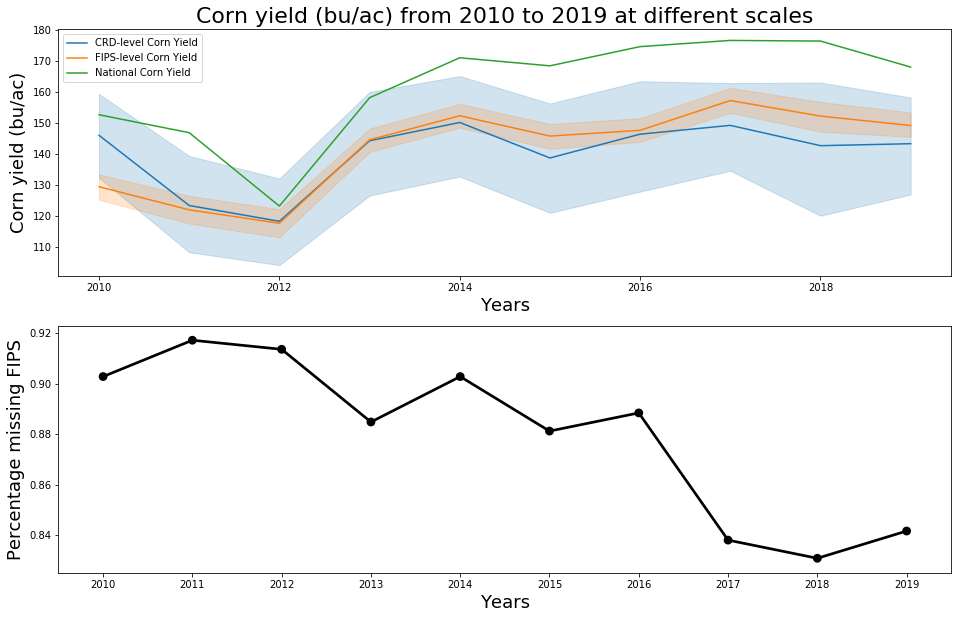

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))

plt.subplot(211)
g = sns.lineplot(x='Year', y='Yield', data=crd_yld_df, label='CRD-level Corn Yield')
g = sns.lineplot(x='Year', y='Yield', data=fips_yld_df, label='FIPS-level Corn Yield')
g = sns.lineplot(x='Year', y='Value', data=national_yld_df[national_yld_df['Year'] != 2009], 
                 label='National Corn Yield')
g.set_title("Corn yield (bu/ac) from 2010 to 2019 at different scales", fontsize=22)
g.set_xlabel("Years", fontsize=18)
g.set_ylabel('Corn yield (bu/ac)', fontsize=18)
    
plt.subplot(212)
g = sns.pointplot(x='Year', y='missing_pct', data=yr_fips_df, color='black')
g.set_xlabel("Years", fontsize=18)
g.set_ylabel('Percentage missing FIPS', fontsize=18)

plt.show()

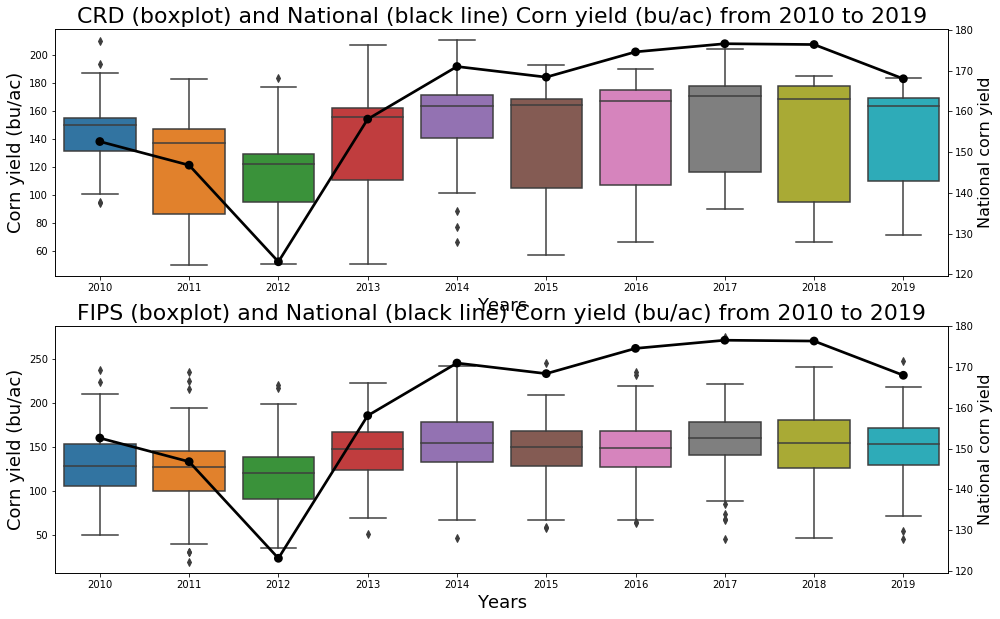

In [33]:
plt.figure(figsize=(16,10))

plt.subplot(211)
g = sns.boxplot(x='Year', y='Yield', data=crd_yld_df)
gt = g.twinx()
gt = sns.pointplot(x='Year', y='Value', data=national_yld_df, color='black', legend=False)
gt.set_ylabel("National corn yield", fontsize=16)
g.set_title("CRD (boxplot) and National (black line) Corn yield (bu/ac) from 2010 to 2019", fontsize=22)
g.set_xlabel("Years", fontsize=18)
g.set_ylabel('Corn yield (bu/ac)', fontsize=18)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
plt.subplot(212)
g = sns.boxplot(x='Year', y='Yield', data=fips_yld_df)
gt = g.twinx()
gt = sns.pointplot(x='Year', y='Value', data=national_yld_df, color='black', legend=False)
gt.set_ylabel("National corn yield", fontsize=16)
g.set_title("FIPS (boxplot) and National (black line) Corn yield (bu/ac) from 2010 to 2019", fontsize=22)
g.set_xlabel("Years", fontsize=18)
g.set_ylabel('Corn yield (bu/ac)', fontsize=18)

plt.show()

* The national corn yield went way off both the FIPS and CRD level corn yield in most of the years of interest, except 2010, 2011 and 2013. This inconsistancy might due to the incompleteness of the dataset